In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\17472\Desktop\Retail_Sales_Analysis\retail_sales_data.csv")

# Show the first few rows
print(df.head())

# Show all column names
print(df.columns)


   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  11/24/2023     CUST001    Male   34           Beauty   
1               2   2/27/2023     CUST002  Female   26         Clothing   
2               3   1/13/2023     CUST003    Male   50      Electronics   
3               4   5/21/2023     CUST004    Male   37         Clothing   
4               5    5/6/2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in 'Product Category' with 'Unknown'
df['Product Category'] = df['Product Category'].fillna(value='Unknown')

# Remove rows with missing values
df = df.dropna()

# Confirm missing values are removed
print(df.isnull().sum())


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


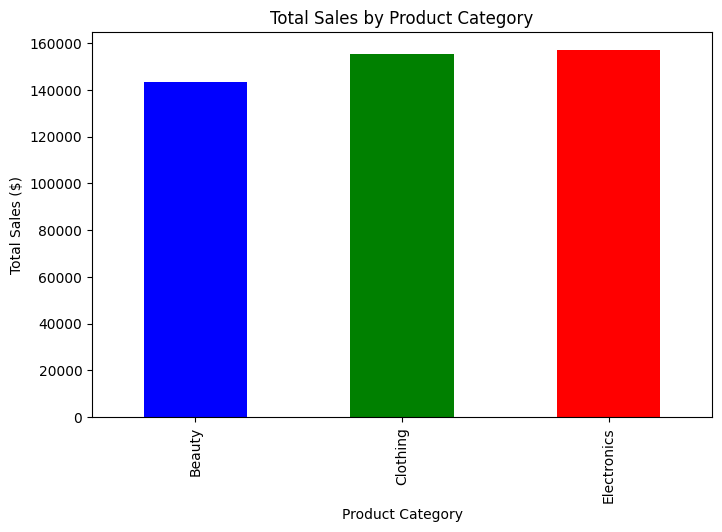

In [3]:
# Group sales by product category
category_sales = df.groupby('Product Category')['Total Amount'].sum()

# Plot sales by category
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Product Category')
plt.show()


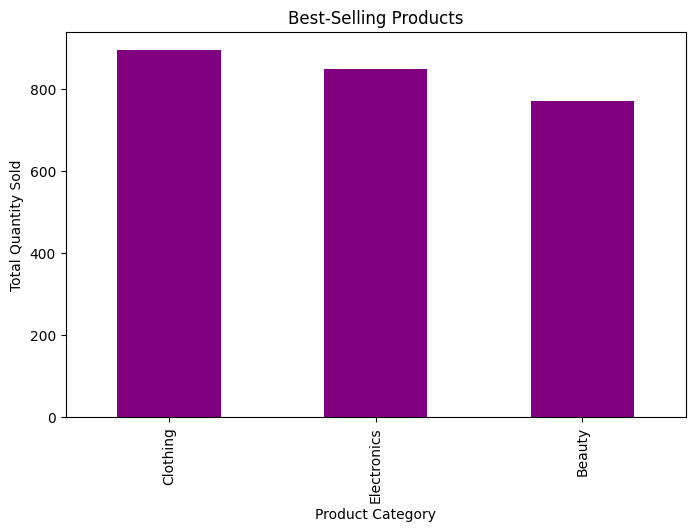

In [4]:
# Find the top 5 best-selling products
top_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)

# Plot top-selling products
plt.figure(figsize=(8,5))
top_products.plot(kind='bar', color='purple')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.title('Best-Selling Products')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Ensure 'Order Status' column exists
if 'Order Status' not in df.columns:
    df['Order Status'] = df['Total Amount'].apply(lambda x: 'Successful' if x > 100 else 'Failed')

# Define features and target variable
X = df[['Quantity', 'Price per Unit']]
y = df['Order Status']

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 1.0
